# ***Car price Prediction***

##Name-Khushal pawar (IT)

**Project Title**: Car Selling Price Prediction using Machine Learning

This project aims to predict the selling price of used cars based on features such as present price, fuel type, transmission, seller type, and car age. The project follows a complete machine learning pipeline including data loading, exploratory data analysis (EDA), feature encoding, model training using Linear Regression and Decision Tree, and performance evaluation using R², MAE, and RMSE metrics.

Pandas is used for data reading, cleaning, and manipulation

Matplotlib is used to create charts and graphs

Seaborn is a Python data visualization library

train_test_split: Used to divide the dataset into training data and testing data.

LinearRegression: Used to create a linear regression model for prediction.

Lasso: Used to create a Lasso regression model with regularization to reduce overfitting.

metrics: Used to measure and evaluate the performance of the model


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
car_dataset = pd.read_csv("/content/car data.csv")

Loading the dataset from csv file to pandas dataframe

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


shows the top 5 rows in this car dataset

In [ ]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


shows the bottom 5 rows in this car dataset

In [ ]:
car_dataset.shape

(301, 9)

checking the no. of rows and columns, in this datset 301 rows and 9 columns are present

# **Exploratory Data Analysis (EDA)**

In [ ]:
car_dataset.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


checking the column type , columns type  object=character type, int float = numerical value

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


information about the dataset

# Data cleaning

In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


 df.describe() gives statistical summary (mean, min, max, etc.)

In [ ]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


checking the sum of null values

In [ ]:
car_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
296,False
297,False
298,False
299,False


 find the duplicated value, In this dataset 0 values are duplicate. duplicated means all row are duplicate value

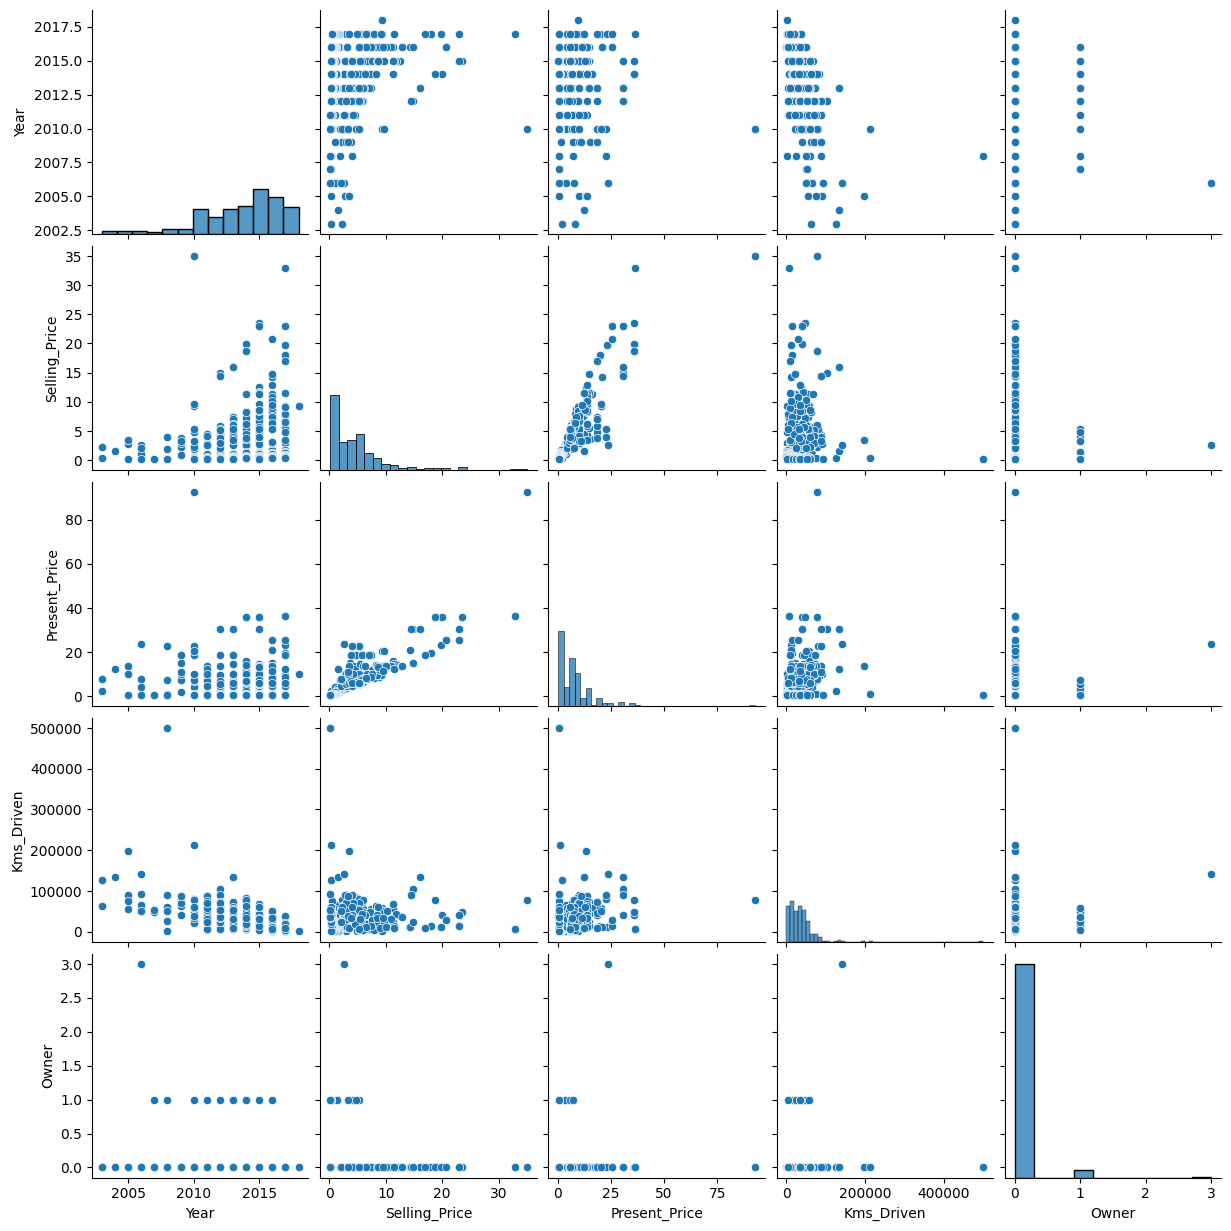

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(car_dataset)
plt.show()


Shows relationships between numerical features.
Helps visually identify correlation with Selling_Price.

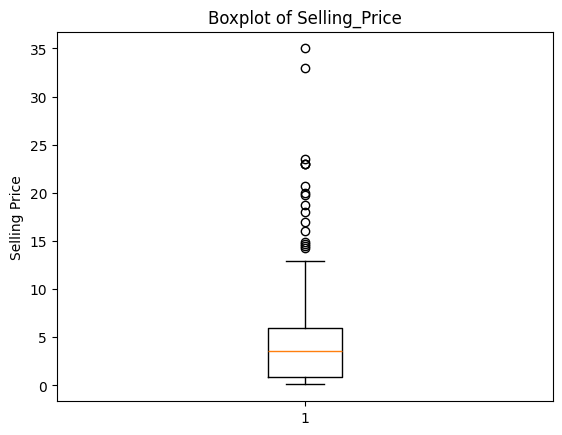

In [ ]:
plt.boxplot(car_dataset['Selling_Price'])
plt.title("Boxplot of Selling_Price")
plt.ylabel("Selling Price")
plt.show()

This boxplot shows how car selling prices are spread and helps spot very high or very low prices.

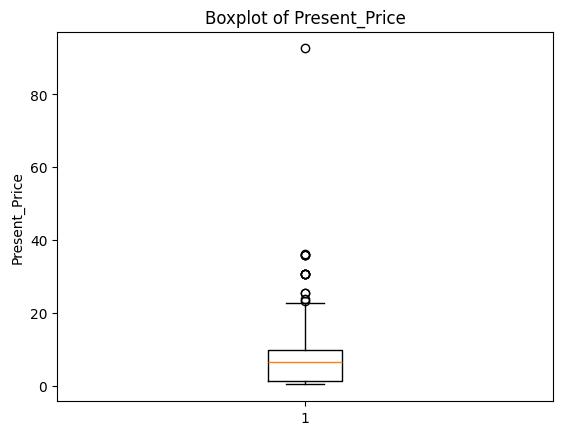

In [ ]:
plt.boxplot(car_dataset['Present_Price'])
plt.title("Boxplot of Present_Price")
plt.ylabel("Present_Price")
plt.show()

This boxplot helps identify very high or very low (outlier) values in the Present_Price column.

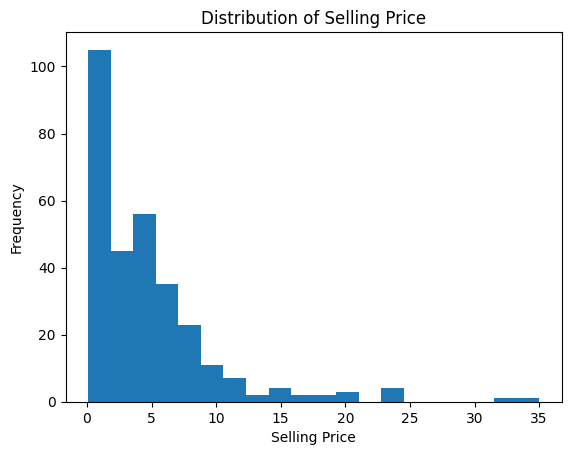

In [ ]:
plt.figure()
plt.hist(car_dataset['Selling_Price'], bins=20)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price')
plt.show()


 This chart shows how often different selling prices appear in the dataset.

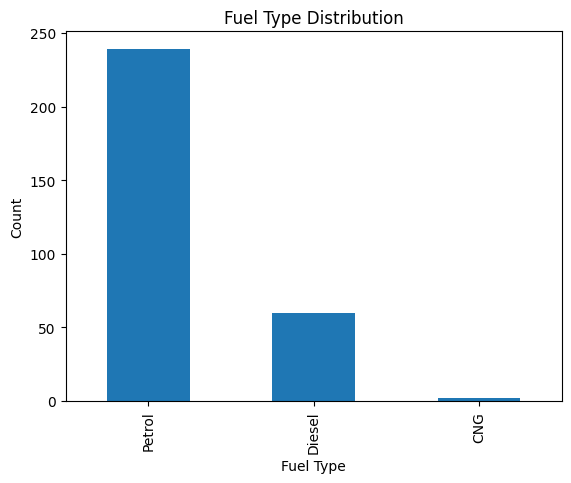

In [ ]:
plt.figure()
car_dataset['Fuel_Type'].value_counts().plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.show()

This code creates a bar chart to show the number of cars for each fuel type in the dataset.

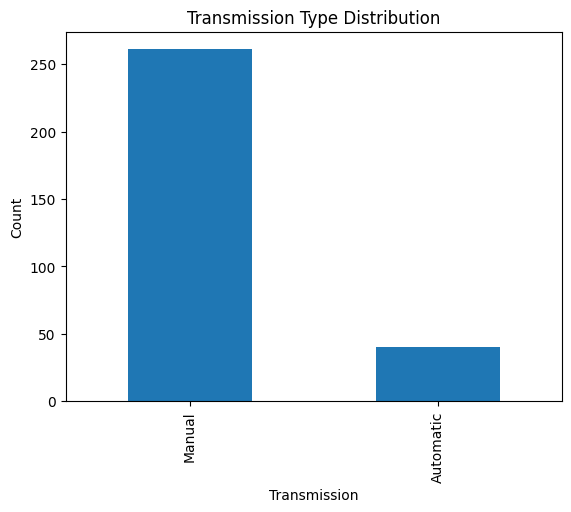

In [ ]:
plt.figure()
car_dataset['Transmission'].value_counts().plot(kind='bar')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Transmission Type Distribution')
plt.show()

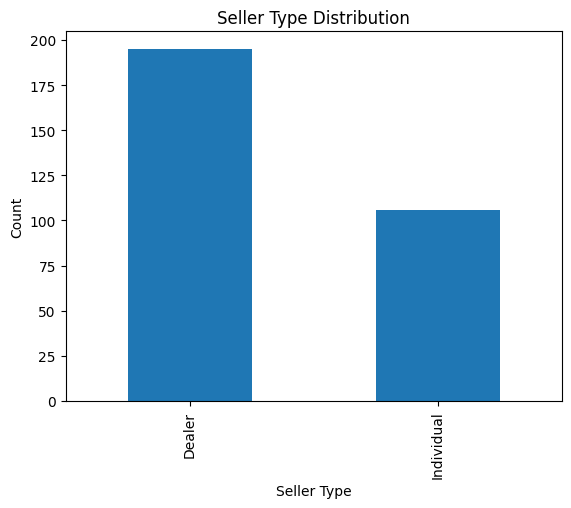

In [ ]:
plt.figure()
car_dataset['Seller_Type'].value_counts().plot(kind='bar')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.title('Seller Type Distribution')
plt.show()

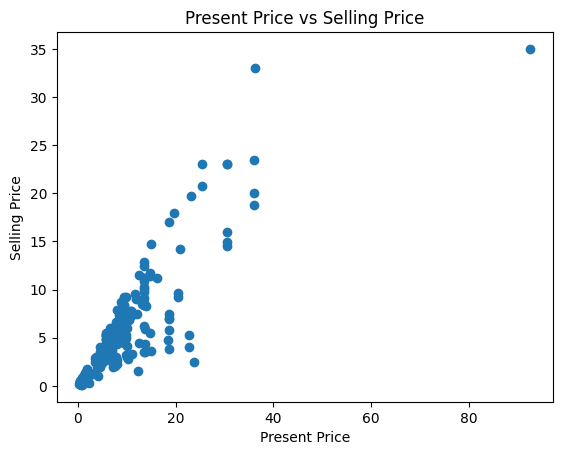

In [ ]:
plt.figure()
plt.scatter(car_dataset['Present_Price'], car_dataset['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Present Price vs Selling Price')
plt.show()


<Figure size 640x480 with 0 Axes>

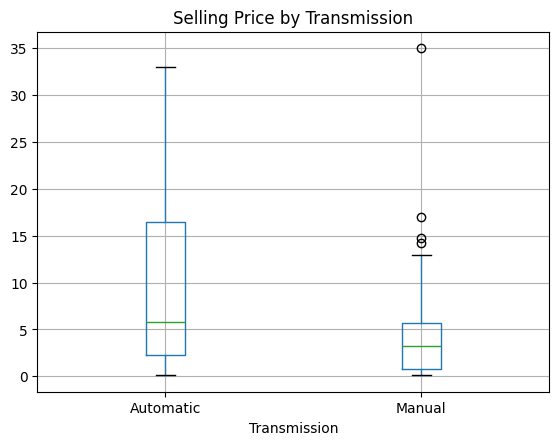

In [ ]:
plt.figure()
car_dataset.boxplot(column='Selling_Price', by='Transmission')
plt.title('Selling Price by Transmission')
plt.suptitle('')
plt.show()


In [ ]:
#checking distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


This code counts and displays how many records belong to each category in Fuel Type, Seller Type, and Transmission.

# Encoding the categorical data


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in car_dataset.select_dtypes(include='object').columns:
    car_dataset[col] = le.fit_transform(car_dataset[col])


Label encoding converts categorical data into numeric form for ML models.

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


# split the data and target data

In [ ]:
X = car_dataset.drop('Selling_Price', axis=1)
y = car_dataset['Selling_Price']


This code separates the dataset into input features (X) and the target variable Selling_Price (y).

In [ ]:
print(X)

     Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0          90  2014           5.59       27000          2            0   
1          93  2013           9.54       43000          1            0   
2          68  2017           9.85        6900          2            0   
3          96  2011           4.15        5200          2            0   
4          92  2014           6.87       42450          1            0   
..        ...   ...            ...         ...        ...          ...   
296        69  2016          11.60       33988          1            0   
297        66  2015           5.90       60000          2            0   
298        69  2009          11.00       87934          2            0   
299        69  2017          12.50        9000          1            0   
300        66  2016           5.90        5464          2            0   

     Transmission  Owner  
0               1      0  
1               1      0  
2               1      0  
3  

In [ ]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


#Spliting the traning and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code splits the data into training and testing sets, with 80% for training and 20% for testing.

# Model training


1. Linear regression

In [ ]:
# loading the linear regrassion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression R2 Score: 0.8465539666864582
MAE: 1.2142339415017116


This code trains a Linear Regression model, makes predictions on test data, and evaluates its performance using R² score and Mean Absolute Error (MAE).


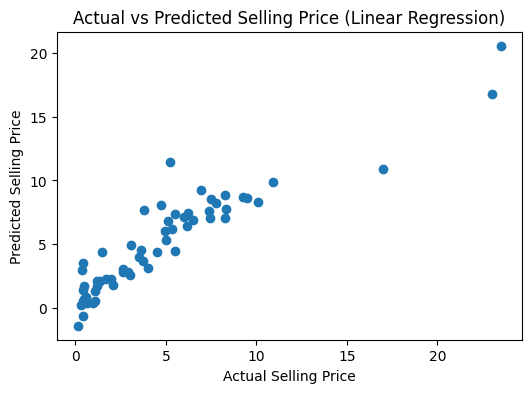

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Linear Regression)")
plt.show()


Linear Regression predicts selling price using a linear relationship between features.

 Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))


Decision Tree R2 Score: 0.9348701172869616
MAE: 0.6826229508196721


This code trains a Decision Tree Regression model, predicts selling prices on test data, and evaluates it using R² score and Mean Absolute Error (MAE).

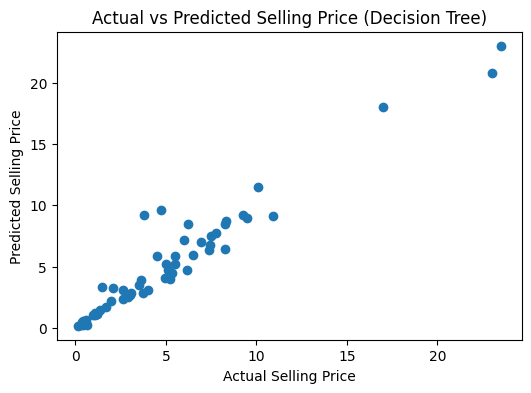

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Decision Tree)")
plt.show()


this scatter plot compares actual selling prices with predicted prices from the Decision Tree model to visually check prediction accuracy.

Model comparison


In [ ]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt) ]})
comparison

,Model,R2 Score
0,Linear Regression,0.846554
1,Decision Tree,0.934870


This code creates a table to compare the R² scores of Linear Regression and Decision Tree models to see which performs better.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dt)

0.9348701172869616

this line calculates the R² score to measure how well the Decision Tree model predicts the test data

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_dt)


0.6826229508196721

This line calculates the Mean Absolute Error (MAE) to find the average prediction error of the Decision Tree model.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse


np.float64(1.2248693473317007)

This code calculates RMSE (Root Mean Squared Error) to measure how far the Decision Tree’s predictions are from the actual values on average.